In [1]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns


import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

In [2]:
folder = "Data/Chicago/"
crime_files = sorted(glob.glob(folder+"*.csv"))


In [3]:
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,3212105,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.0,14.0,41.823730,-87.698440
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.0,NaN,41.783892,-87.684841
2,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.0,NaN,41.756650,-87.641608
3,1310610,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418
4,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,41.954010,-87.709858
...,...,...,...,...,...,...,...,...,...,...,...,...
15939,12961873,01/24/2023 12:53:00 AM,ROBBERY,ARMED - HANDGUN,STREET,False,False,2533,25.0,37.0,41.912355,-87.747282
15940,12962426,01/24/2023 12:55:00 PM,ASSAULT,SIMPLE,APARTMENT,False,True,414,4.0,8.0,41.753415,-87.576764
15941,12962329,01/24/2023 12:55:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,1723,17.0,45.0,41.954371,-87.717832
15942,12961869,01/24/2023 12:57:00 AM,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,True,2525,25.0,26.0,41.919100,-87.717814


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7725161 entries, 0 to 15943
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 663.1+ MB


In [5]:
df.shape

(7725161, 12)

In [6]:
#make a copy of df
df_original = df.copy()

In [7]:
#missing data
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description      9972
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614847
Latitude                 84138
Longitude                84138
dtype: int64

In [8]:
date_format = "%m/%d/%Y %I:%M:%S %p"

In [9]:
#converting date to datetime
df['Date'] = pd.to_datetime(df['Date'], format = date_format, infer_datetime_format= False)
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,3212105,2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.0,14.0,41.823730,-87.698440
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.0,NaN,41.783892,-87.684841
2,1310288,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.0,NaN,41.756650,-87.641608
3,1310610,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418
4,1311049,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,41.954010,-87.709858
...,...,...,...,...,...,...,...,...,...,...,...,...
15939,12961873,2023-01-24 00:53:00,ROBBERY,ARMED - HANDGUN,STREET,False,False,2533,25.0,37.0,41.912355,-87.747282
15940,12962426,2023-01-24 12:55:00,ASSAULT,SIMPLE,APARTMENT,False,True,414,4.0,8.0,41.753415,-87.576764
15941,12962329,2023-01-24 12:55:00,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,1723,17.0,45.0,41.954371,-87.717832
15942,12961869,2023-01-24 00:57:00,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,True,2525,25.0,26.0,41.919100,-87.717814


In [10]:
#setting the index
df = df.set_index('Date')

In [11]:
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,3212105,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.0,14.0,41.823730,-87.698440
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.0,NaN,41.783892,-87.684841
2001-01-01 01:00:00,1310288,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.0,NaN,41.756650,-87.641608
2001-01-01 01:00:00,1310610,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418
2001-01-01 01:00:00,1311049,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,41.954010,-87.709858
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-24 00:53:00,12961873,ROBBERY,ARMED - HANDGUN,STREET,False,False,2533,25.0,37.0,41.912355,-87.747282
2023-01-24 12:55:00,12962426,ASSAULT,SIMPLE,APARTMENT,False,True,414,4.0,8.0,41.753415,-87.576764
2023-01-24 12:55:00,12962329,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,1723,17.0,45.0,41.954371,-87.717832


# 1) Comparing Police Districts:
- Which district has the most crimes? 
- Which has the least?

In [12]:
## Grouping the data by District
crimes_by_district = df.groupby('District').size()
crimes_by_district

District
1.0     311432
2.0     365468
3.0     391785
4.0     438556
5.0     342647
6.0     451521
7.0     447834
8.0     519281
9.0     377784
10.0    332848
11.0    496311
12.0    382058
14.0    299199
15.0    331858
16.0    258187
17.0    222887
18.0    346330
19.0    346492
20.0    136369
21.0         4
22.0    253134
24.0    233122
25.0    439775
31.0       232
dtype: int64

In [13]:
print(f'The district {crimes_by_district.idxmax()} has the most crimes while district {crimes_by_district.idxmin()} has the least number of crimes. ')

The district 8.0 has the most crimes while district 21.0 has the least number of crimes. 


# 2) Crimes Across the Years: 
- Is the total number of crimes increasing or decreasing across the years? 
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [14]:
#resampling total number of crimes by year
crimes_by_year = df.resample('Y').size()
crimes_by_year

Date
2001-12-31    485865
2002-12-31    486799
2003-12-31    475979
2004-12-31    469418
2005-12-31    453767
2006-12-31    448172
2007-12-31    437080
2008-12-31    427160
2009-12-31    392816
2010-12-31    370490
2011-12-31    351957
2012-12-31    336252
2013-12-31    307451
2014-12-31    275721
2015-12-31    264732
2016-12-31    269768
2017-12-31    269032
2018-12-31    268731
2019-12-31    261190
2020-12-31    212008
2021-12-31    208346
2022-12-31    236483
2023-12-31     15944
Freq: A-DEC, dtype: int64

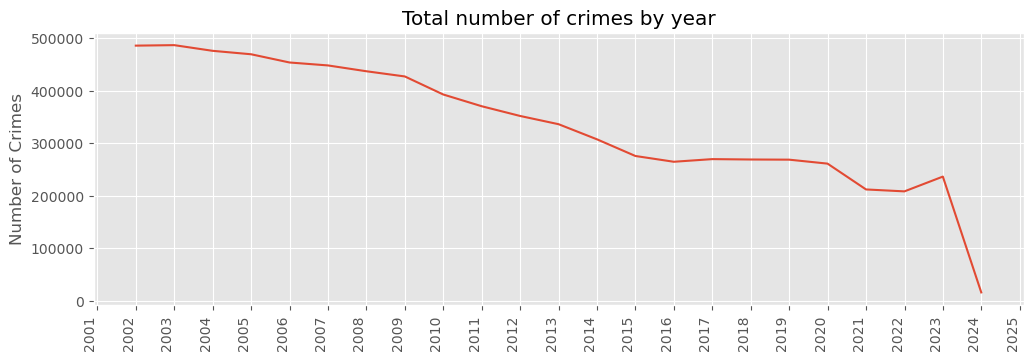

In [15]:
plt.style.use(['ggplot'])
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(crimes_by_year)
ax.set(title = "Total number of crimes by year", ylabel = 'Number of Crimes')

#customize major ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)

fig.autofmt_xdate(which = 'major', rotation = 90);

- The number of crimes were decreasing from 2001 to end of 2015 and there was a small increment to end of 2016 and remained constant till the end of 2018.
- Again it started to drop the numbers from 2020 to start of 2022 and suddenly increased during 2022
- But through the complete time period, the number of total crimes has decreased.

In [16]:
#primary types of crimes
primary_type = df['Primary Type'].unique()
primary_type

array(['OFFENSE INVOLVING CHILDREN', 'BATTERY', 'CRIMINAL DAMAGE',
       'THEFT', 'ASSAULT', 'PUBLIC PEACE VIOLATION', 'SEX OFFENSE',
       'NARCOTICS', 'GAMBLING', 'WEAPONS VIOLATION', 'BURGLARY',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT',
       'CRIM SEXUAL ASSAULT', 'LIQUOR LAW VIOLATION', 'ROBBERY',
       'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING',
       'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [17]:
#resampling total number of crimes by primary type and year
crimes_by_type = df.groupby('Primary Type').resample('Y').size()
crimes_by_type

Primary Type       Date      
ARSON              2001-12-31    1011
                   2002-12-31    1032
                   2003-12-31     955
                   2004-12-31     778
                   2005-12-31     691
                                 ... 
WEAPONS VIOLATION  2019-12-31    6339
                   2020-12-31    8431
                   2021-12-31    8978
                   2022-12-31    8724
                   2023-12-31     626
Length: 750, dtype: int64

In [18]:
#unstack dataframe
crimes_unstack = crimes_by_type.unstack(0)
crimes_unstack

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-31,1011.0,31384.0,93458.0,26014.0,1.0,1779.0,55857.0,30.0,13241.0,14941.0,...,29663.0,6026.0,9.0,2750.0,8.0,18441.0,2240.0,204.0,99274.0,4276.0
2002-12-31,1032.0,31523.0,94153.0,25623.0,0.0,1808.0,55941.0,26.0,13880.0,13729.0,...,32600.0,6408.0,8.0,2457.0,2.0,18523.0,2173.0,200.0,98331.0,4281.0
2003-12-31,955.0,29477.0,88379.0,25156.0,0.0,1572.0,55011.0,39.0,14807.0,13459.0,...,31147.0,6214.0,6.0,2430.0,2.0,17332.0,2077.0,247.0,98876.0,4211.0
2004-12-31,778.0,28850.0,87136.0,24564.0,0.0,1545.0,53164.0,34.0,15913.0,13255.0,...,29532.0,7476.0,9.0,2495.0,1.0,15978.0,1805.0,215.0,95463.0,4298.0
2005-12-31,691.0,27066.0,83964.0,25503.0,0.0,1528.0,54548.0,29.0,16655.0,13590.0,...,28028.0,6124.0,4.0,2730.0,2.0,16047.0,1816.0,192.0,85684.0,4106.0
2006-12-31,726.0,25945.0,80666.0,24324.0,0.0,1440.0,57124.0,44.0,14505.0,13606.0,...,27101.0,7034.0,4.0,3068.0,7.0,15968.0,1575.0,186.0,86240.0,3821.0
2007-12-31,712.0,26313.0,79593.0,24858.0,0.0,1509.0,53749.0,50.0,13699.0,14170.0,...,26863.0,6087.0,5.0,3315.0,1.0,15450.0,1529.0,213.0,85156.0,3554.0
2008-12-31,644.0,25449.0,75926.0,26218.0,0.0,1518.0,52842.0,34.0,12310.0,14930.0,...,26533.0,5141.0,4.0,3013.0,0.0,16703.0,1500.0,190.0,88434.0,3877.0
2009-12-31,616.0,22861.0,68460.0,26767.0,0.0,1406.0,47725.0,34.0,10851.0,13874.0,...,25601.0,3940.0,10.0,3147.0,0.0,15981.0,1265.0,168.0,80975.0,4158.0


C:\Users\sheha\AppData\Local\Temp\ipykernel_19420\1040978853.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(12,4))


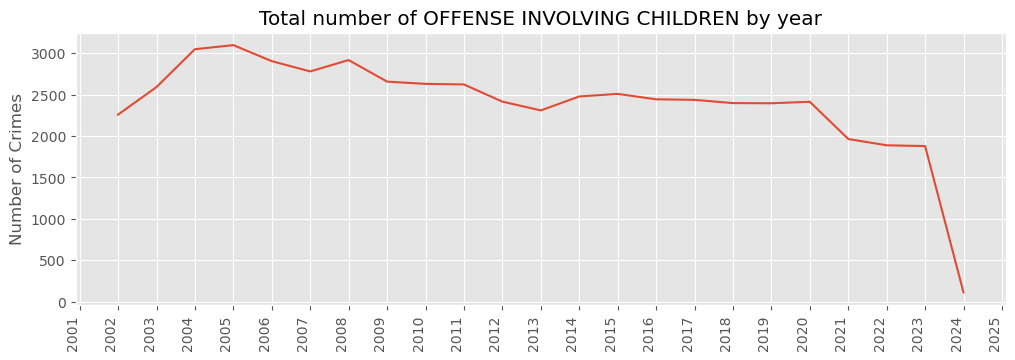

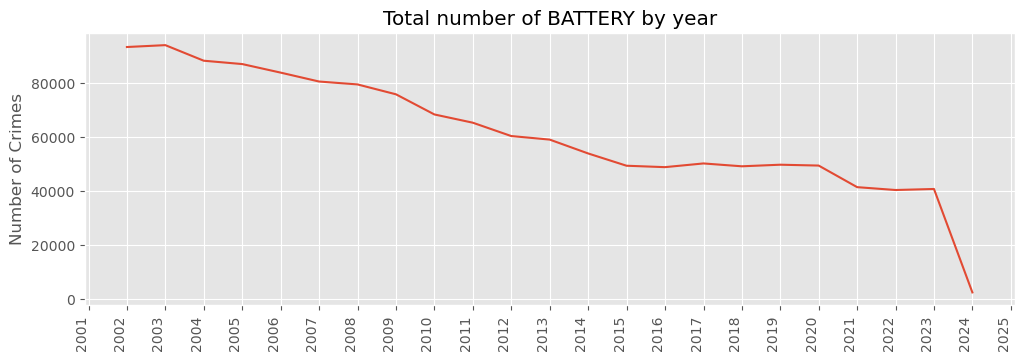

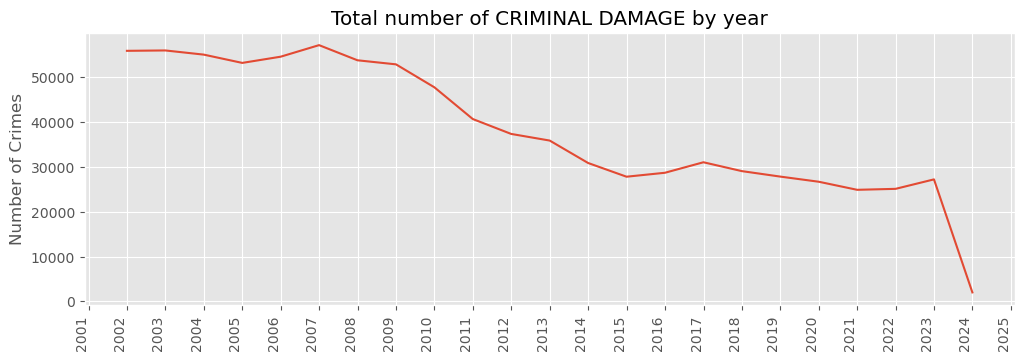

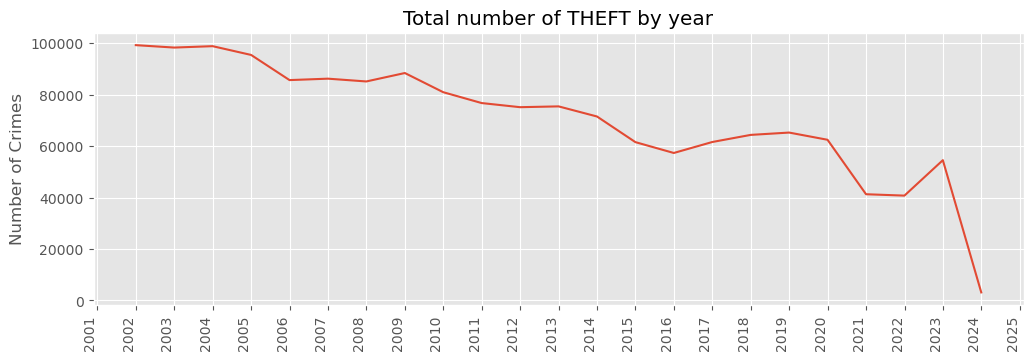

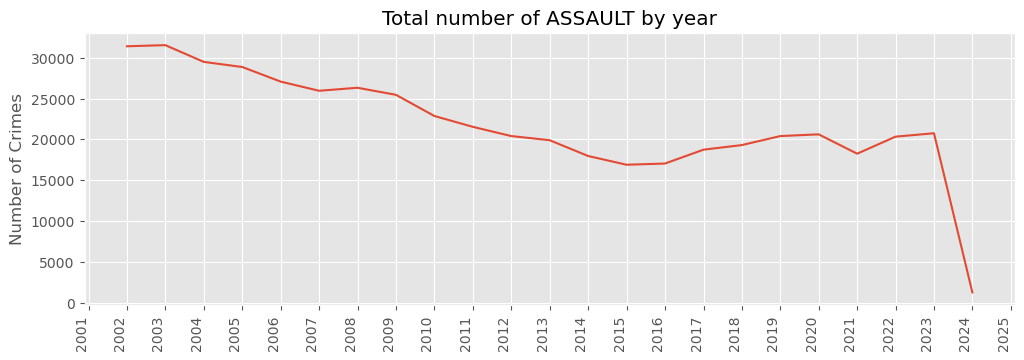

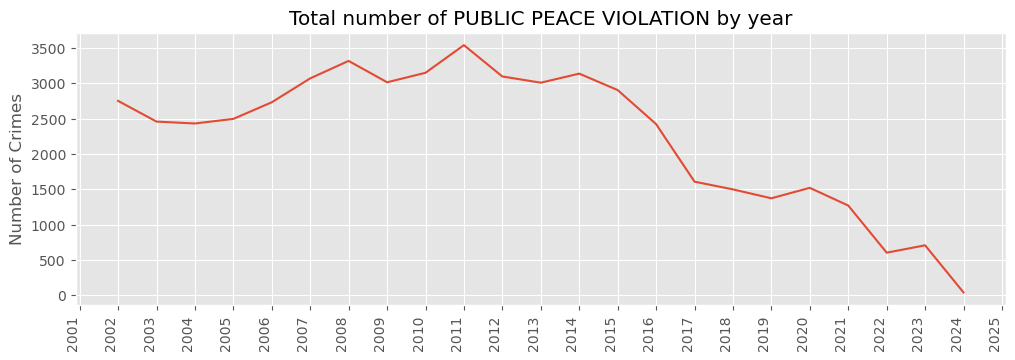

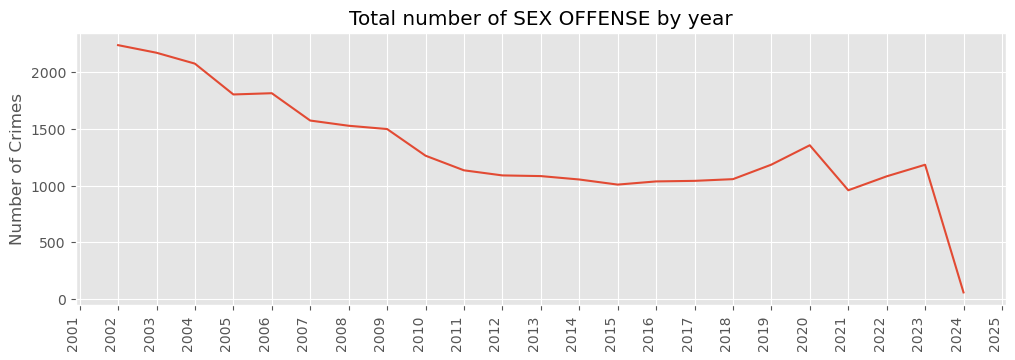

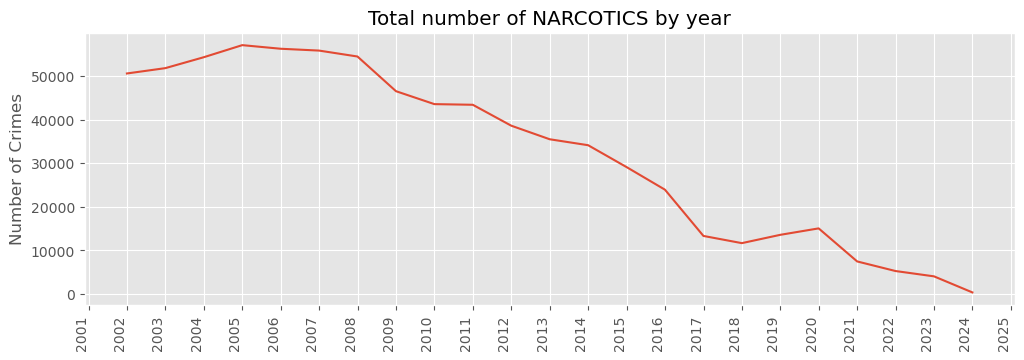

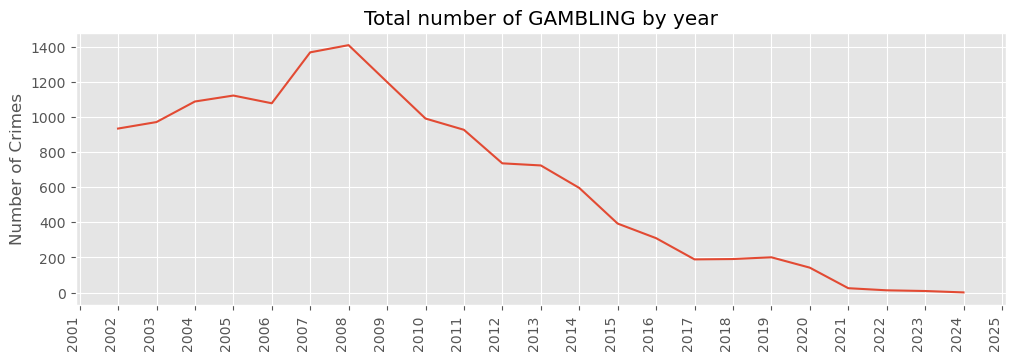

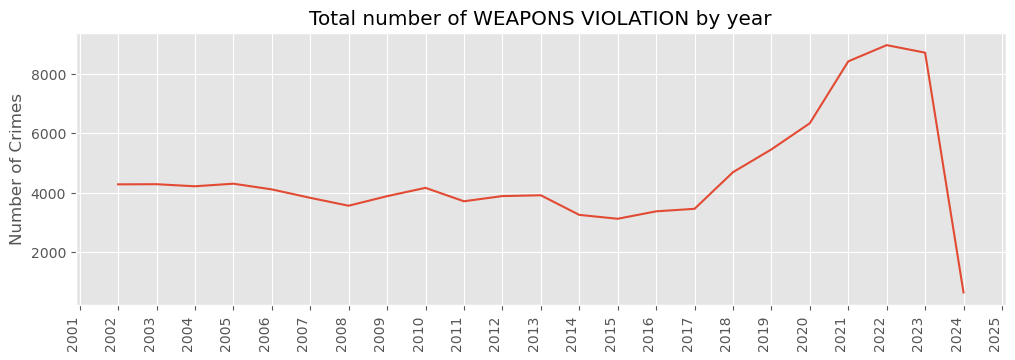

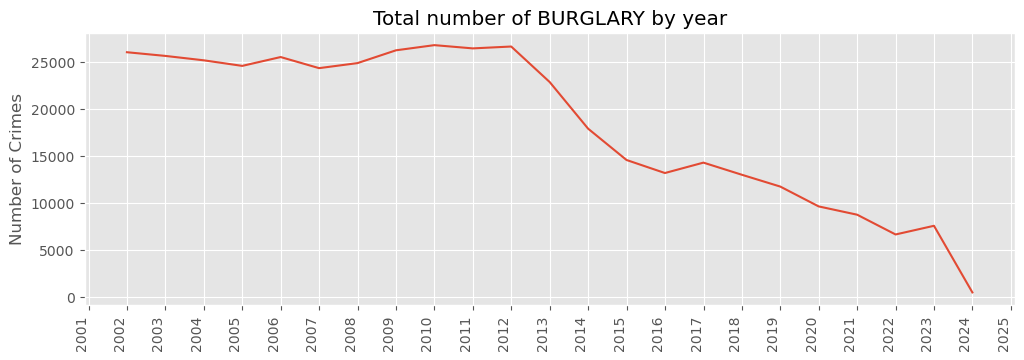

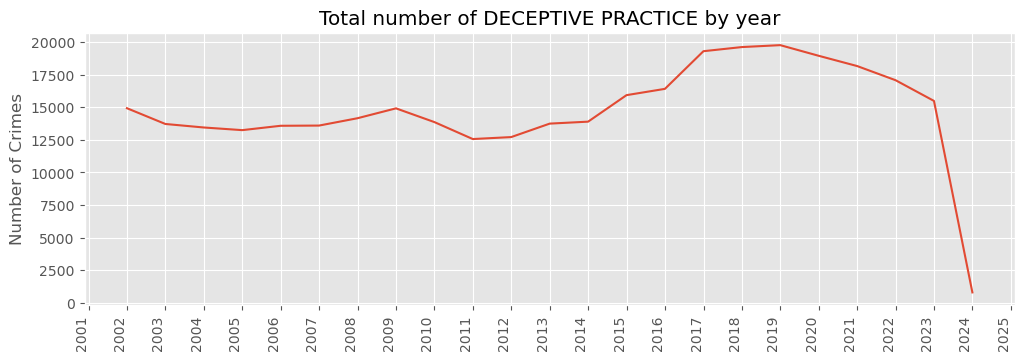

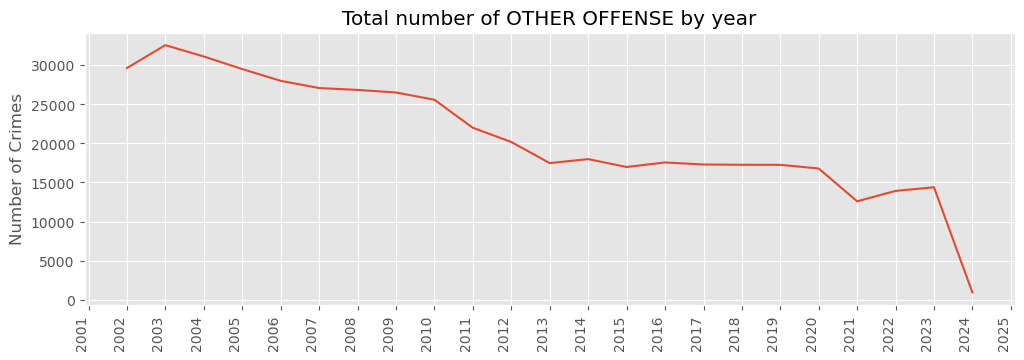

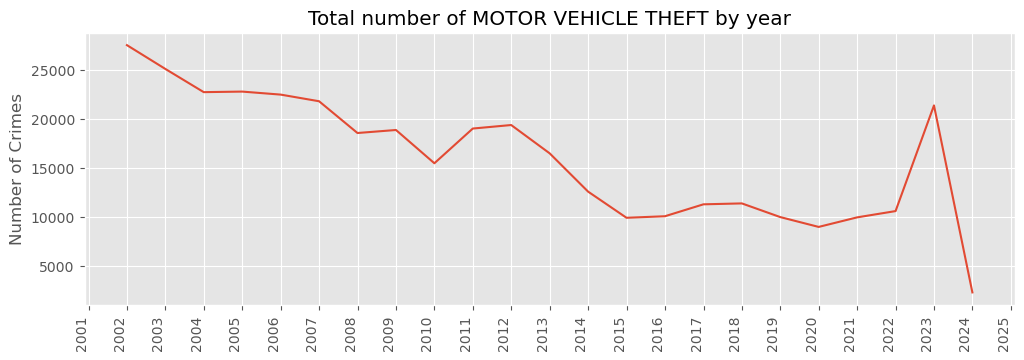

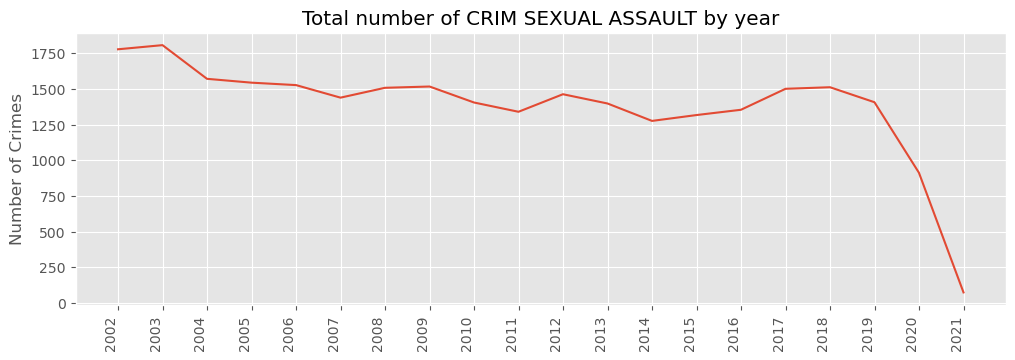

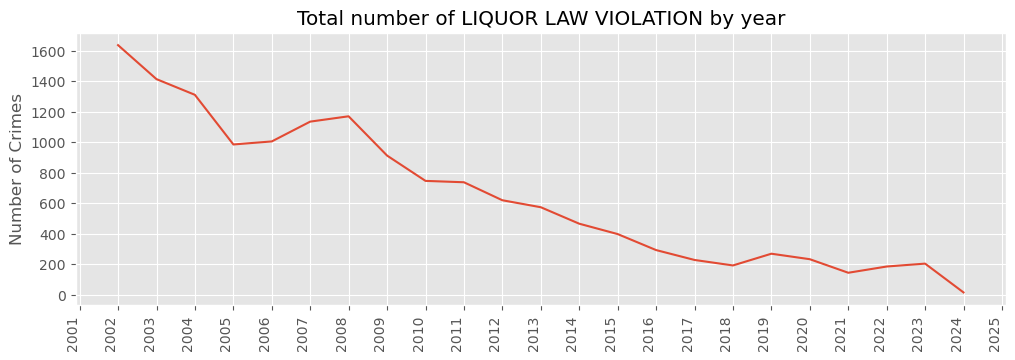

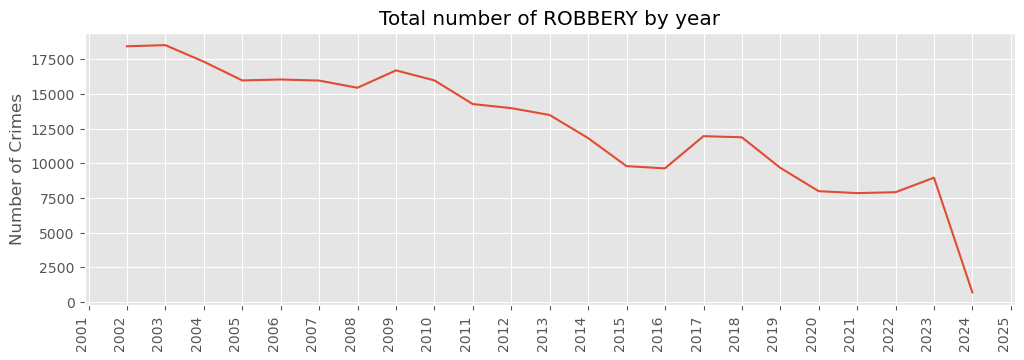

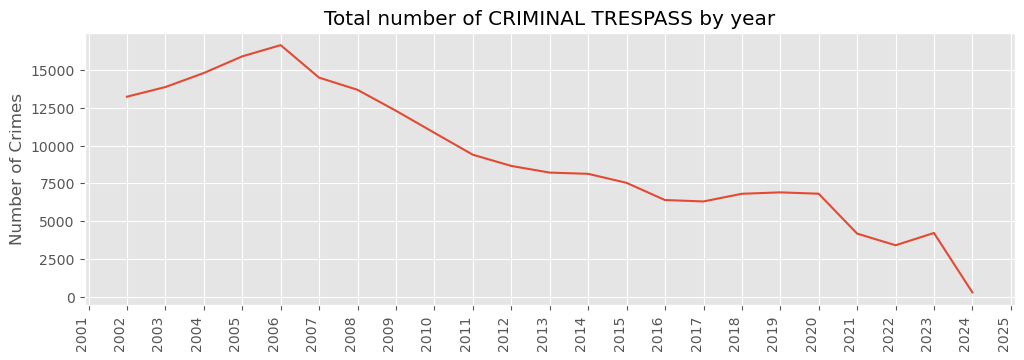

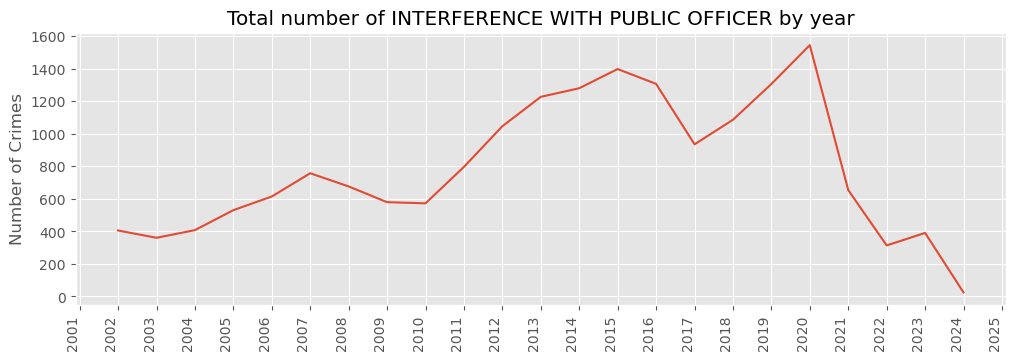

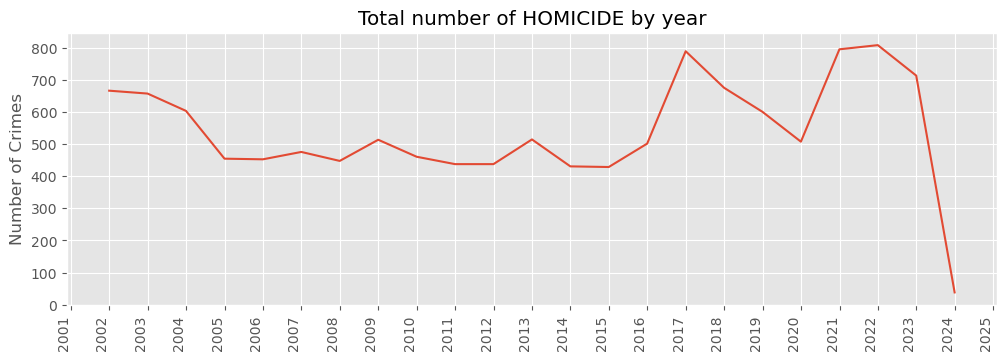

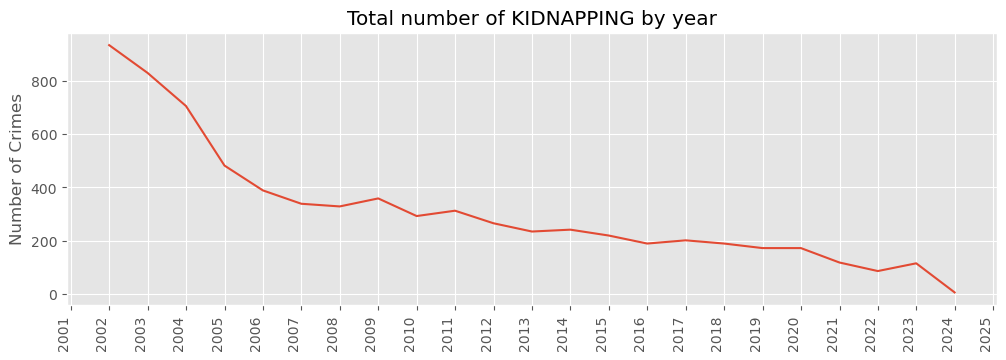

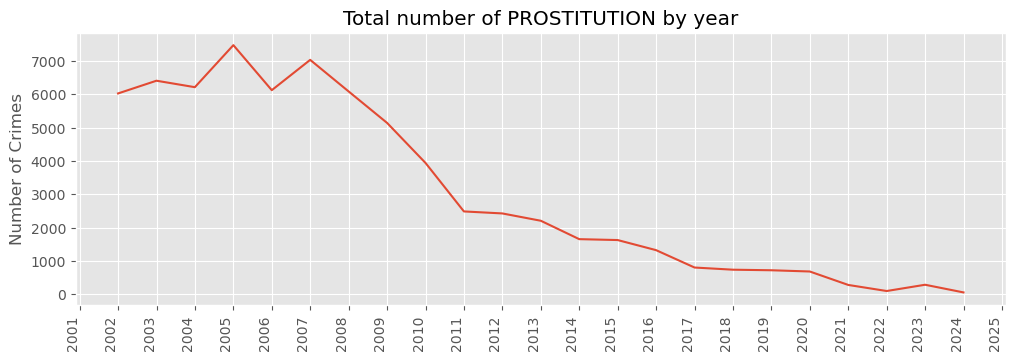

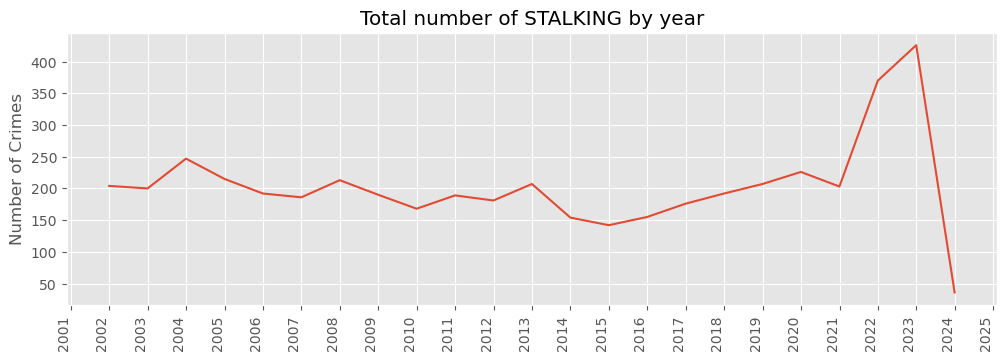

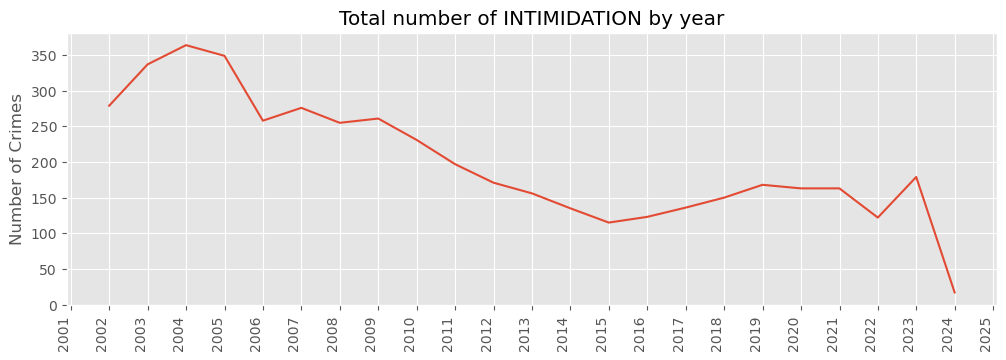

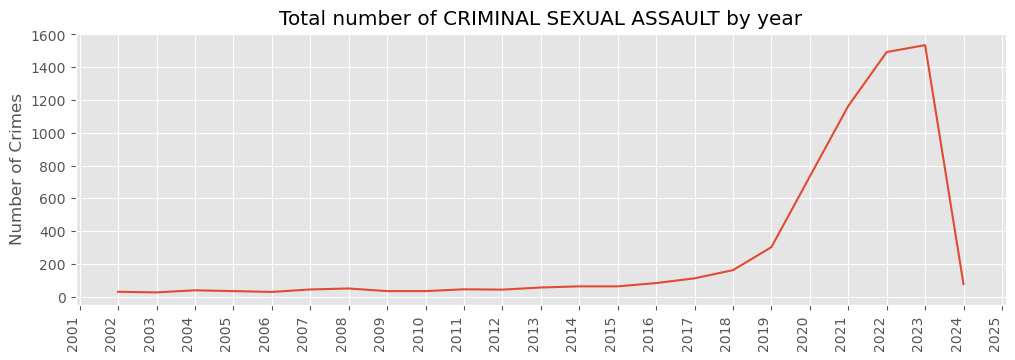

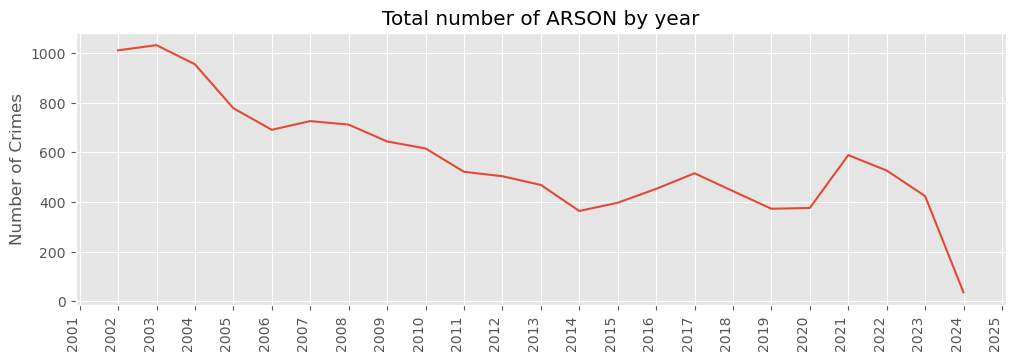

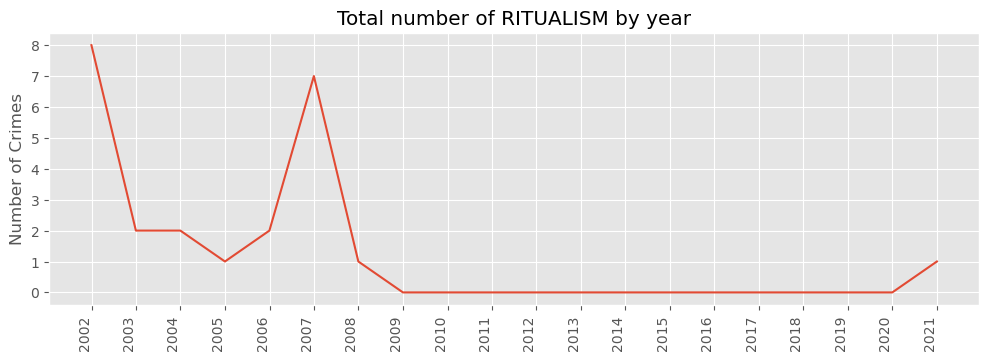

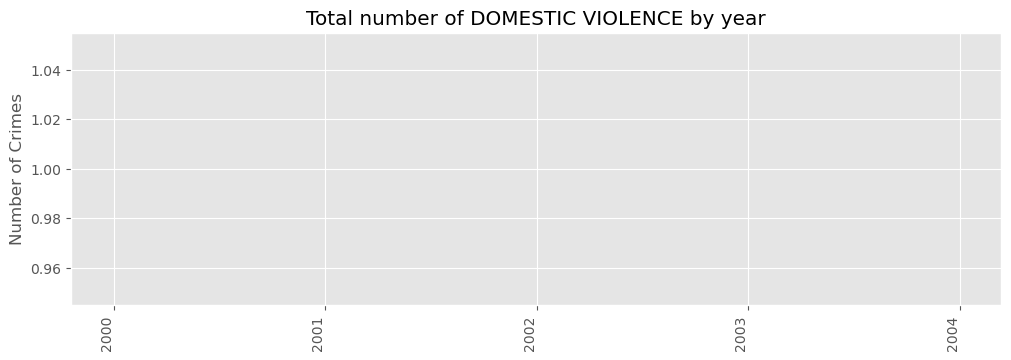

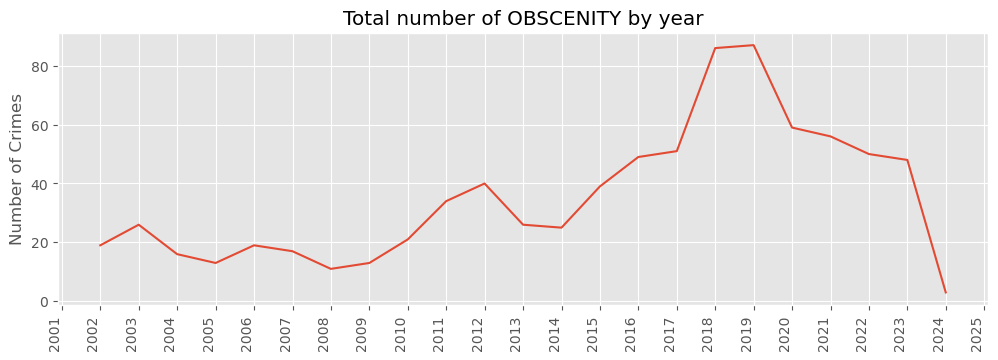

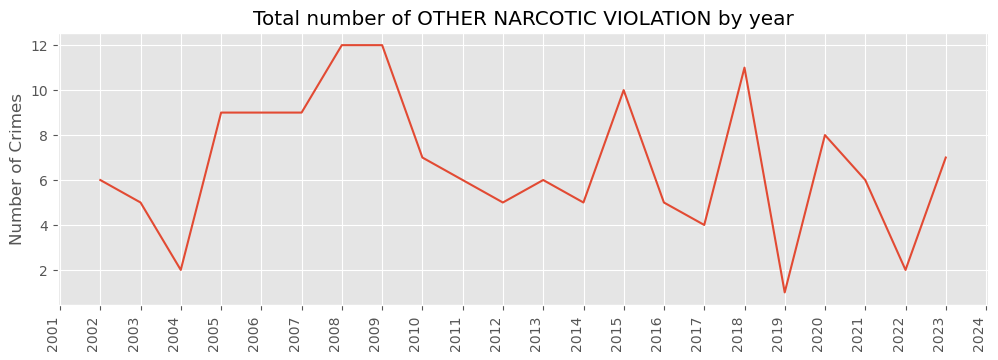

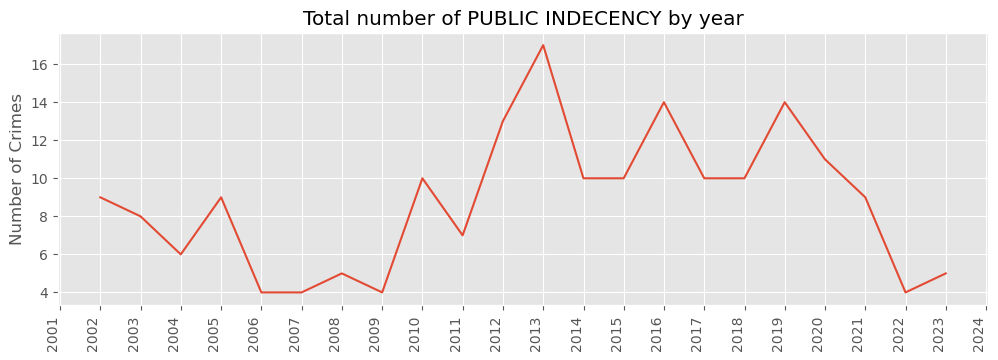

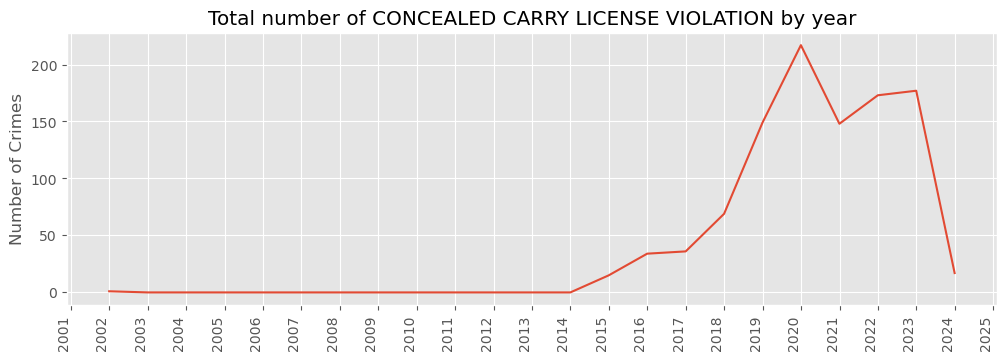

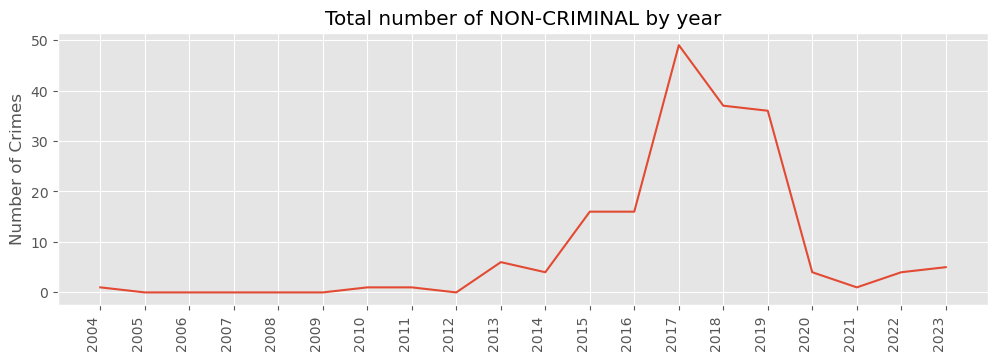

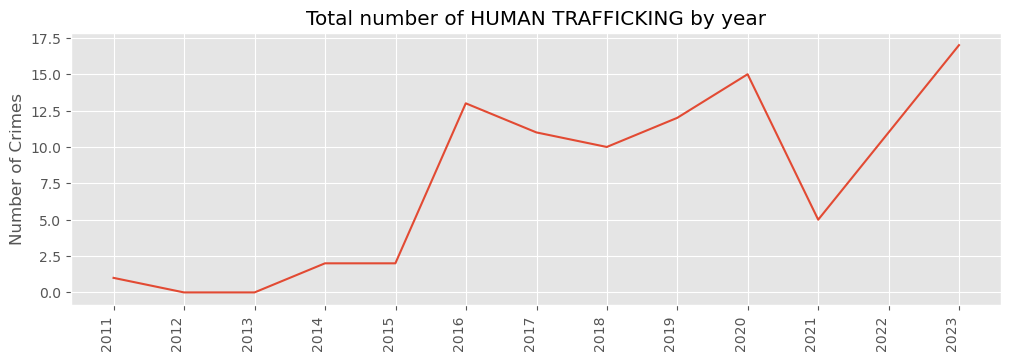

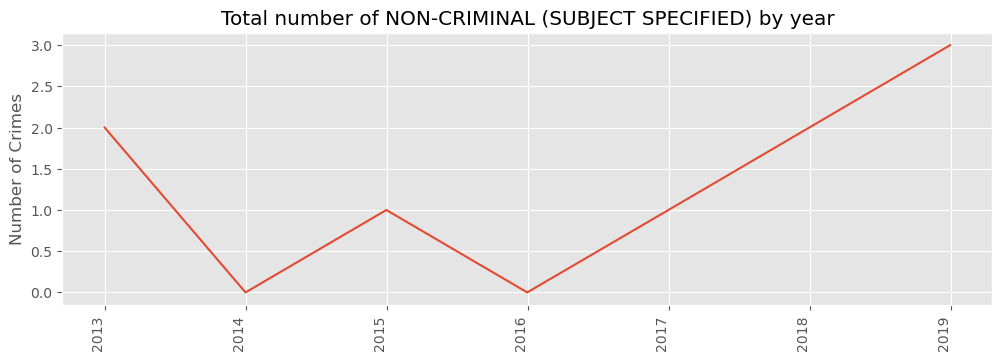

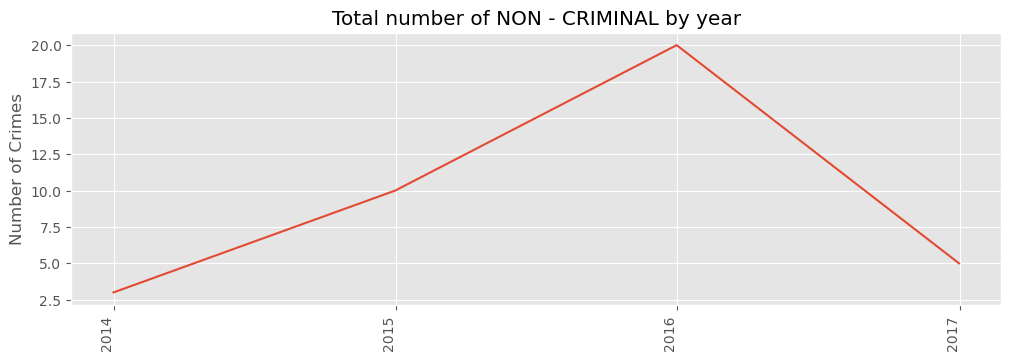

In [19]:
#plot crimes for each primary type of crimes
for i in primary_type:
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(crimes_unstack.loc[:, i])
    ax.set(title = f"Total number of {i} by year", ylabel = 'Number of Crimes')

    #customize major ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter('%Y')

    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)

    fig.autofmt_xdate(which = 'major', rotation = 90);


While the overall trend of total number of crimes decreases with time, following individual crimes that are doing the opposite (increasing).
- Weapon violation
- deceptive practice
- interference with public officer
- homicide
- stalking 
- criminal sexual assault
- obscenity
- concealed carry license violation
- non-criminal
- human trafficking

# 4) Comparing Months:
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [20]:
crime_by_month = df.index.month.value_counts().sort_index()
crime_by_month

1     616826
2     529207
3     629483
4     626922
5     682695
6     681452
7     716941
8     710087
9     667876
10    675923
11    608565
12    579184
Name: Date, dtype: int64

[Text(0.5, 1.0, 'Total number of crimes by Month'),
 Text(0, 0.5, 'Number of Crimes')]

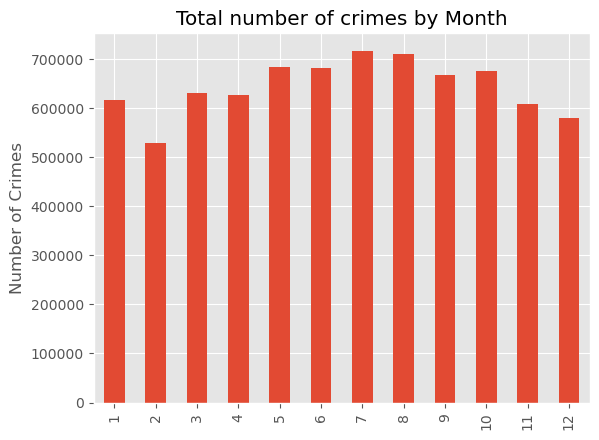

In [21]:
ax = crime_by_month.plot(kind = 'bar')
ax.set(title = "Total number of crimes by Month", ylabel = 'Number of Crimes')

In [22]:
print(f'The highest number of murders occurred in {crime_by_month.idxmax()}th month while the least number of murders occurred in {crime_by_month.idxmin()}th month')

The highest number of murders occurred in 7th month while the least number of murders occurred in 2th month


In [23]:
#resampling total number of crimes by primary type and year
crimes_by_mt = df.groupby('Primary Type').resample('M').size()
crimes_by_mt

Primary Type       Date      
ARSON              2001-01-31     67
                   2001-02-28     57
                   2001-03-31     93
                   2001-04-30     89
                   2001-05-31     94
                                ... 
WEAPONS VIOLATION  2022-09-30    778
                   2022-10-31    732
                   2022-11-30    596
                   2022-12-31    540
                   2023-01-31    626
Length: 8633, dtype: int64

In [24]:
#unstack dataframe
crimes_by_mt_unstack = crimes_by_mt.unstack(0)
crimes_by_mt_unstack

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-31,67.0,2123.0,6526.0,1934.0,NaN,162.0,3966.0,4.0,1192.0,1397.0,...,2800.0,563.0,NaN,161.0,2.0,1396.0,218.0,26.0,7865.0,337.0
2001-02-28,57.0,2029.0,6040.0,1666.0,NaN,134.0,3665.0,1.0,1063.0,1161.0,...,2488.0,426.0,1.0,173.0,0.0,1159.0,149.0,13.0,6669.0,301.0
2001-03-31,93.0,2824.0,7662.0,1832.0,NaN,149.0,4616.0,4.0,1141.0,1313.0,...,2836.0,550.0,0.0,267.0,2.0,1399.0,184.0,17.0,7765.0,344.0
2001-04-30,89.0,2746.0,8328.0,1932.0,NaN,132.0,4922.0,2.0,1133.0,1199.0,...,2483.0,564.0,1.0,229.0,1.0,1341.0,169.0,29.0,7702.0,321.0
2001-05-31,94.0,2903.0,8887.0,1997.0,1.0,155.0,4756.0,2.0,1067.0,1259.0,...,2529.0,503.0,1.0,239.0,1.0,1491.0,227.0,12.0,8420.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,50.0,1883.0,3713.0,653.0,13.0,NaN,2614.0,138.0,378.0,1445.0,...,1133.0,59.0,1.0,64.0,NaN,863.0,115.0,33.0,5094.0,778.0
2022-10-31,40.0,1833.0,3492.0,687.0,10.0,NaN,2832.0,160.0,373.0,1457.0,...,1145.0,26.0,1.0,72.0,NaN,945.0,88.0,39.0,5209.0,732.0
2022-11-30,30.0,1650.0,3069.0,677.0,18.0,NaN,2454.0,106.0,329.0,1305.0,...,1028.0,14.0,NaN,46.0,NaN,842.0,95.0,45.0,4675.0,596.0


In [29]:
crimes_by_mt_unstack.index= crimes_by_mt_unstack.index.month
crimes_by_mt_unstack

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
1,67.0,2123.0,6526.0,1934.0,NaN,162.0,3966.0,4.0,1192.0,1397.0,...,2800.0,563.0,NaN,161.0,2.0,1396.0,218.0,26.0,7865.0,337.0
2,57.0,2029.0,6040.0,1666.0,NaN,134.0,3665.0,1.0,1063.0,1161.0,...,2488.0,426.0,1.0,173.0,0.0,1159.0,149.0,13.0,6669.0,301.0
3,93.0,2824.0,7662.0,1832.0,NaN,149.0,4616.0,4.0,1141.0,1313.0,...,2836.0,550.0,0.0,267.0,2.0,1399.0,184.0,17.0,7765.0,344.0
4,89.0,2746.0,8328.0,1932.0,NaN,132.0,4922.0,2.0,1133.0,1199.0,...,2483.0,564.0,1.0,229.0,1.0,1341.0,169.0,29.0,7702.0,321.0
5,94.0,2903.0,8887.0,1997.0,1.0,155.0,4756.0,2.0,1067.0,1259.0,...,2529.0,503.0,1.0,239.0,1.0,1491.0,227.0,12.0,8420.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,50.0,1883.0,3713.0,653.0,13.0,NaN,2614.0,138.0,378.0,1445.0,...,1133.0,59.0,1.0,64.0,NaN,863.0,115.0,33.0,5094.0,778.0
10,40.0,1833.0,3492.0,687.0,10.0,NaN,2832.0,160.0,373.0,1457.0,...,1145.0,26.0,1.0,72.0,NaN,945.0,88.0,39.0,5209.0,732.0
11,30.0,1650.0,3069.0,677.0,18.0,NaN,2454.0,106.0,329.0,1305.0,...,1028.0,14.0,NaN,46.0,NaN,842.0,95.0,45.0,4675.0,596.0


In [31]:
sum_crimes_month = crimes_by_mt_unstack.groupby(crimes_by_mt_unstack.index).sum()
sum_crimes_month

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
1,953.0,36112.0,103781.0,33141.0,79.0,2581.0,64582.0,598.0,18755.0,30925.0,...,43051.0,6436.0,8.0,3540.0,3.0,24105.0,2760.0,413.0,126580.0,8556.0
2,807.0,33416.0,93592.0,25652.0,69.0,1902.0,55426.0,424.0,16679.0,25313.0,...,38562.0,5659.0,15.0,3399.0,1.0,17272.0,2013.0,313.0,104941.0,6400.0
3,1111.0,41707.0,117867.0,30070.0,77.0,2119.0,71870.0,489.0,18734.0,28554.0,...,43235.0,6141.0,9.0,4669.0,3.0,20190.0,2356.0,398.0,123720.0,8165.0
4,1099.0,42027.0,118492.0,31371.0,78.0,2141.0,75102.0,431.0,17737.0,27578.0,...,41611.0,6034.0,13.0,4341.0,1.0,20907.0,2265.0,392.0,125632.0,8396.0
5,1230.0,48453.0,135674.0,36065.0,96.0,2412.0,79683.0,524.0,18378.0,27452.0,...,42184.0,6089.0,22.0,5493.0,1.0,23709.0,2796.0,396.0,137493.0,9932.0
6,1236.0,47250.0,135899.0,35961.0,92.0,2521.0,78915.0,578.0,17492.0,28162.0,...,40643.0,5574.0,22.0,4975.0,0.0,24407.0,2916.0,419.0,143394.0,9397.0
7,1350.0,47899.0,136809.0,39280.0,95.0,2681.0,83393.0,593.0,18028.0,28453.0,...,41515.0,5875.0,13.0,4721.0,1.0,27246.0,3045.0,428.0,159045.0,9786.0
8,1183.0,46453.0,128723.0,40597.0,96.0,2607.0,81706.0,572.0,18563.0,29070.0,...,41054.0,6284.0,25.0,4397.0,3.0,27394.0,2875.0,404.0,158922.0,9886.0
9,1132.0,45417.0,122331.0,38388.0,118.0,2460.0,75465.0,537.0,17914.0,27778.0,...,37143.0,5877.0,19.0,4882.0,3.0,26162.0,2770.0,395.0,145582.0,9433.0


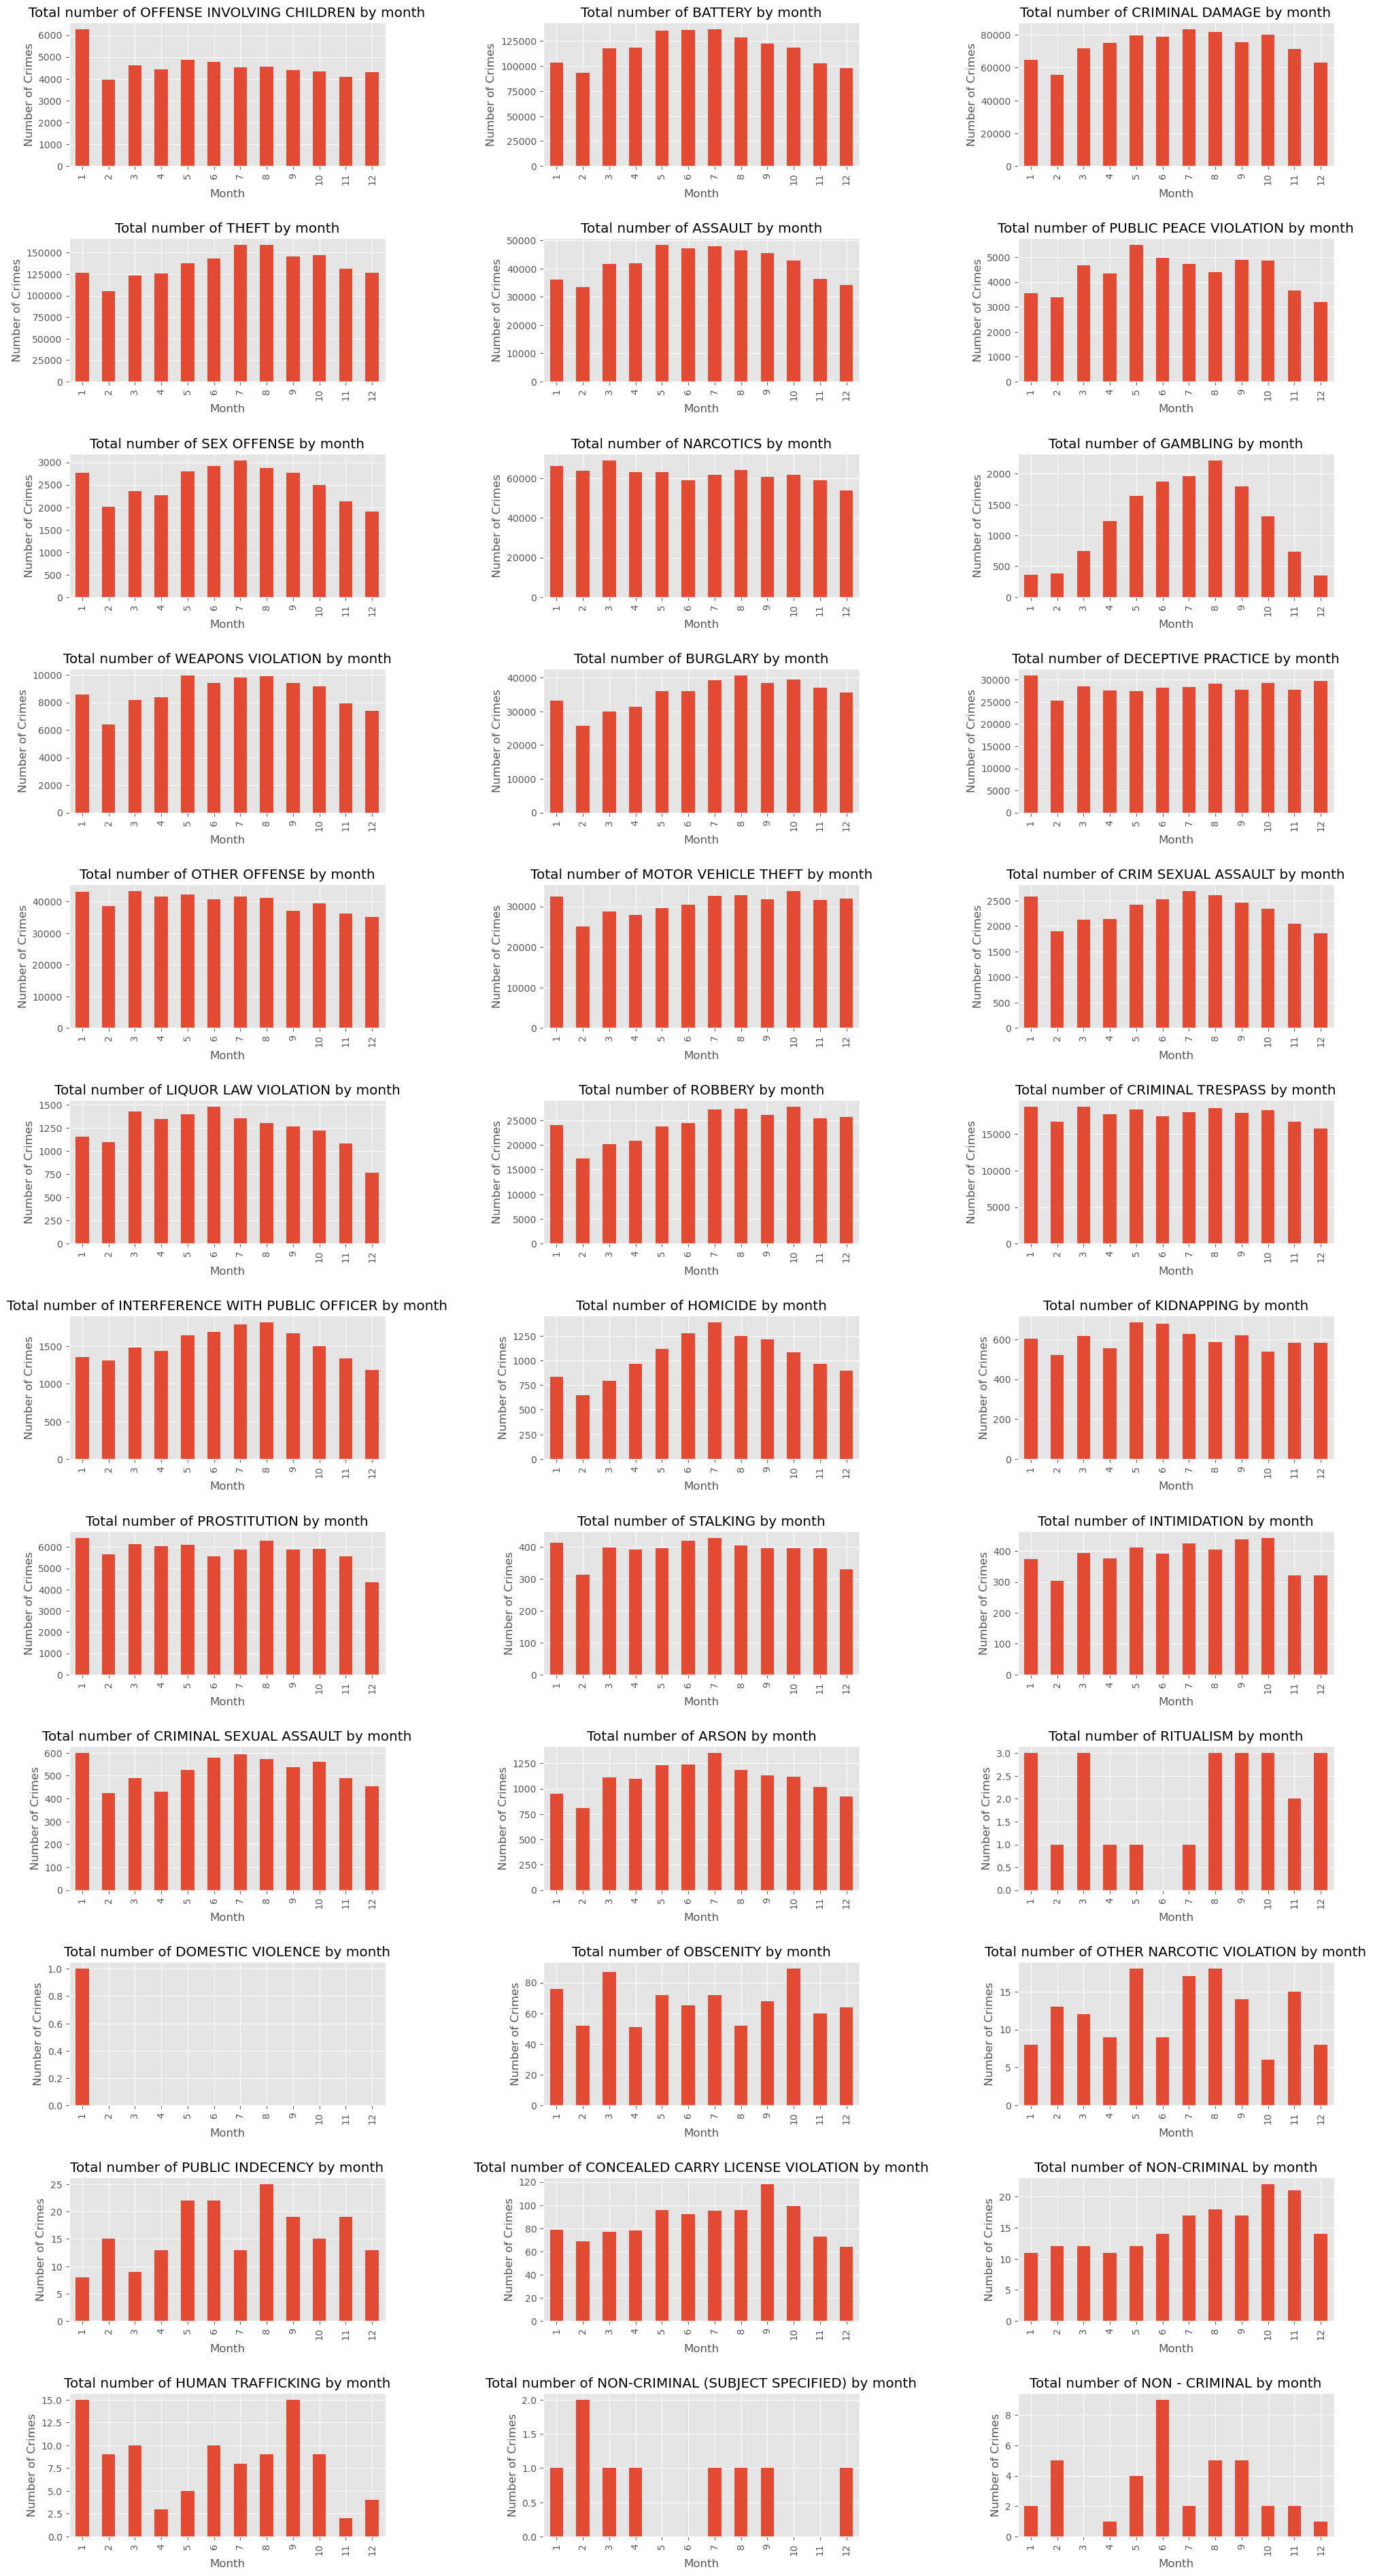

In [78]:
#plot crimes for each primary type of crimes
fig, axes = plt.subplots(nrows = 12, ncols = 3, figsize=(24, 48))
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
axes = axes.ravel()
for i, col in enumerate(primary_type):
    sum_crimes_month.loc[:, col].plot(kind = 'bar', ax = axes[i])
 
    axes[i].set(title = f"Total number of {col} by month", 
                ylabel = 'Number of Crimes',
               xlabel = 'Month');

- The overall trend is that total number of crimes are higher in January and the middle of the year (May to October). It usually shows higher number of January comparative to February.

- Following primary types of criminals went out of the overall number of crimes over months.
    - Gambling
    - ritualism
    - domestic violence
    - other narcotic violation
    - public indecency
    - non-criminal (subject specified)
    - non-criminal.